## CryptoBot

#### 1. Get an Api Key

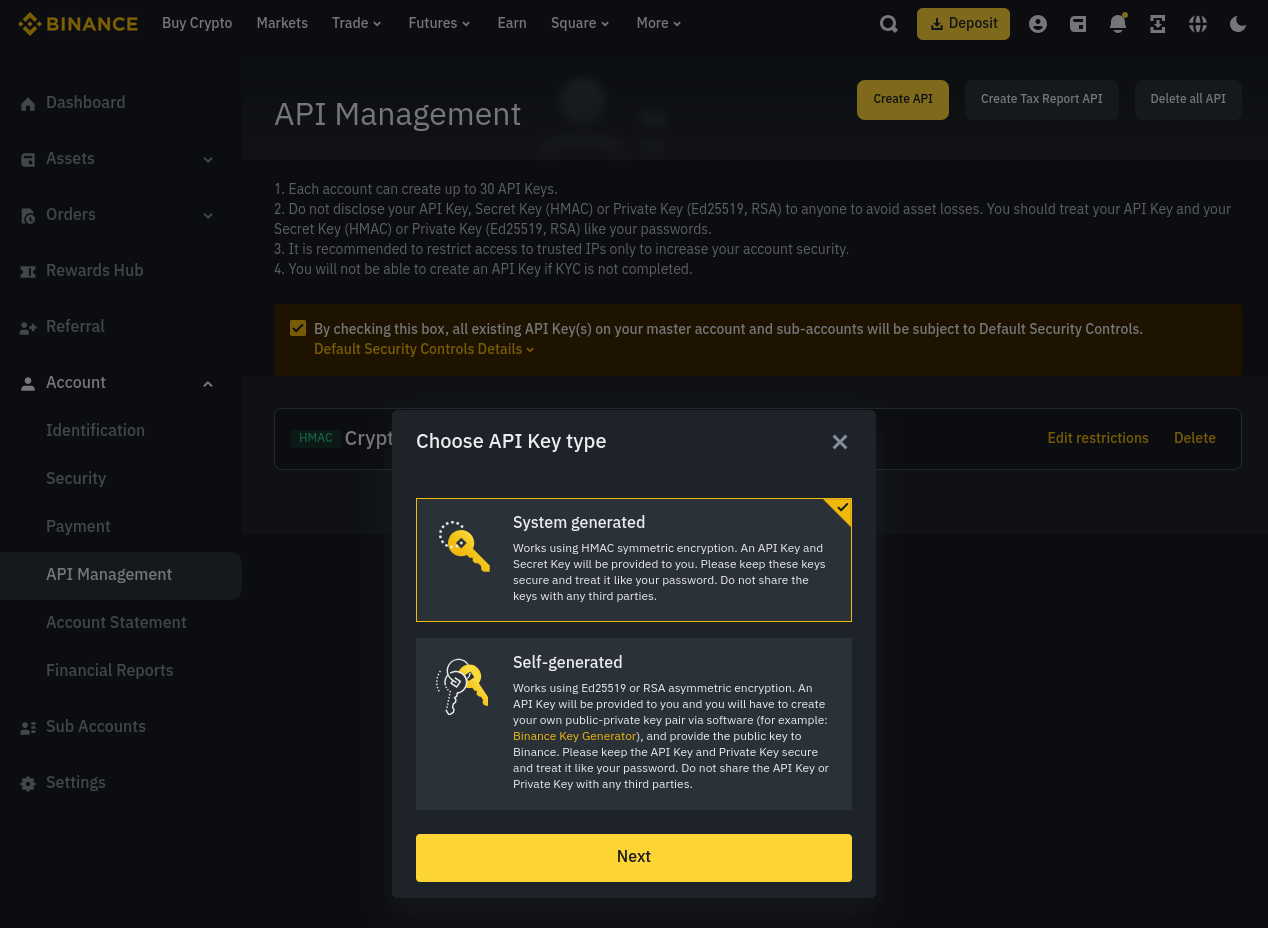

In [ ]:
from IPython.display import Image
Image(filename='BinanceApiKey.png', width=500, height=500)

#### 2. Install Libraries

2.1 pip install pandas </br>
2.2 pip install python-binance </br>
2.3 pip install python-dotenv

#### 3. Import Libraries & API Keys

In [71]:
import pandas as pd
from binance import BinanceSocketManager
from dotenv import load_dotenv
import os
from binance.client import Client

In [72]:
load_dotenv()
binance_api_key = os.getenv("BINANCE_API_KEY")
binance_api_secret = os.getenv("BINANCE_API_SECRET")
client = Client(binance_api_key, binance_api_secret, testnet=True)

## Historical Data (Market Data Endpoint)
###### https://binance-docs.github.io/apidocs/spot/en/#market-data-endpoints

### 1.1 Klines based

The data displayed in the Klines (Candlesticks) is based on the completed transactions between buyers and sellers on the Binance exchange.

In [62]:
symbol = "BTCUSDT" 
interval = Client.KLINE_INTERVAL_1HOUR 
start_str="41 days ago UTC"

In [ ]:
candles = client.get_historical_klines(
    symbol=symbol,
    interval=interval,
    start_str=start_str
)

In [ ]:
columns = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
           'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
           'Taker buy quote asset volume', 'Ignore']
df = pd.DataFrame(candles, columns=columns)

In [65]:
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
df['Close time'] = pd.to_datetime(df['Close time'], unit='ms')

In [68]:
df = df[['Open time', 'Open', 'High', 'Low', 'Close', 'Volume']]
df.tail()

,Open time,Open,High,Low,Close,Volume
845,2024-12-10 18:00:00,94689.87000000,117957.00000000,24166.00000000,95081.01000000,14.66577000
846,2024-12-10 19:00:00,95129.19000000,117957.00000000,24166.00000000,95927.97000000,16.54606000
847,2024-12-10 20:00:00,95927.98000000,117957.00000000,24166.00000000,96633.14000000,17.05609000
848,2024-12-10 21:00:00,96633.13000000,118228.00000000,24166.00000000,97012.08000000,9.58877000
849,2024-12-10 22:00:00,97012.08000000,97056.97000000,96860.79000000,96881.12000000,0.68145000


In [ ]:
#json_str = df.to_json(orient='records')

#with open('BTCUSDT_historical_data.csv', "w") as file:
    #file.write(json_str)
#print("Text file written!")

Text file written!


### 1.2 Trade based

These data reflect the completed transactions where buyers and sellers have executed their orders on the platform.

In [ ]:
historical_trades = client.get_historical_trades(symbol='BTCUSDT', limit=1000)
df = pd.DataFrame(historical_trades)
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.head()

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,4186942,96996.01000000,0.00294000,285.16826940,2024-12-10 21:45:23.410,False,True
1,4186943,96996.05000000,0.00170000,164.89328500,2024-12-10 21:45:23.410,False,True
2,4186944,96996.05000000,0.00093000,90.20632650,2024-12-10 21:45:23.418,False,True
3,4186945,96996.06000000,0.00181000,175.56286860,2024-12-10 21:45:23.418,False,True
4,4186946,96994.94000000,0.00294000,285.16512360,2024-12-10 21:45:28.214,True,True


In [ ]:
#json_str = df.to_json(orient='records')

#with open('BTCUSDT_historical_data.csv', "w") as file:
    #file.write(json_str)
#print("Text file written!")

Text file written!


## Streaming Data (Market Data Endpoint)
###### https://binance-docs.github.io/apidocs/spot/en/#websocket-market-streams

### Transaction

#### 6. Order Book

In [39]:
market_depth = client.get_order_book(symbol='BTCUSDT')
bids = pd.DataFrame(market_depth['bids'])
bids.columns = ['price','bids']
asks = pd.DataFrame(market_depth['asks'])
asks.columns = ['price','asks']
df = pd.concat([bids,asks]).fillna(0)
df.head()

,price,bids,asks
0,96786.29000000,0.00100000,0
1,96596.69000000,0.00001000,0
2,96539.63000000,0.00312000,0
3,96538.15000000,0.00130000,0
4,96536.56000000,0.00513000,0
